In [1]:
import pandas
import pyreadr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def transaction_v2_mainnet():
    transaction = pyreadr.read_r("/data/IDEA_DeFi_Research/Data/Lending_Protocols/Aave/V2/Mainnet/transactions.rds")
    df = transaction[None]
    df['DateTime'] = df['timestamp'].transform(lambda x: datetime.fromtimestamp(x))
    df.head()
    # We are going to make a super basic linear model to try and predict how the AAVE token's price changes each day.
    # This script will engineer one feature to use for this predictive task: dailyTransactionCount.

    # To do this, we group the data by the date portion of the DateTime object, 
    # and then simply count how many transactions are in each group
    dailyTransactionCount = df.groupby([df['DateTime'].dt.date]).count()
    
    # Add the liquidations type to the dataframe
    liquidations = df[df['type'] == "liquidation"]
    liquidations = liquidations.filter(items = ['DateTime', 'type', 'user', 'principalAmountUSD', 'collateralAmountUSD'], axis = 'columns')
    liquidations = liquidations.groupby([liquidations['DateTime'].dt.date]).sum()
    print(liquidations)
    
    # add borrow type to the dataframe
    borrows = df[df['type'] == "borrow"]
    dailyBorrowsAmountsUSD = borrows.groupby([borrows['DateTime'].dt.date]).sum()
    dailyBorrowsAmountsUSD['amountBorrowsUSD'] = dailyBorrowsAmountsUSD['amountUSD']
    dailyBorrowsAmountsUSD = dailyBorrowsAmountsUSD.filter(items = ['DateTime', 'amountBorrowsUSD'], axis = 'columns')
    print(dailyBorrowsAmountsUSD)
    
    # add deposit type to the dataframe
    deposits = df[df['type'] == "deposit"]
    dailyDepositsAmountsUSD = deposits.groupby([deposits['DateTime'].dt.date]).sum()
    dailyDepositsAmountsUSD['amountDepositsUSD'] = dailyDepositsAmountsUSD['amountUSD']
    dailyDepositsAmountsUSD = dailyDepositsAmountsUSD.filter(items = ['DateTime', 'amountDepositsUSD'], axis = 'columns')
    print(dailyDepositsAmountsUSD)
    
    # add repay type to the dataframe
    repays = df[df['type'] == "repay"]
    dailyRepaysAmountsUSD = repays.groupby([repays['DateTime'].dt.date]).sum()
    dailyRepaysAmountsUSD['amountRepaysUSD'] = dailyRepaysAmountsUSD['amountUSD']
    dailyRepaysAmountsUSD = dailyRepaysAmountsUSD.filter(items = ['DateTime', 'amountRepaysUSD'], axis = 'columns')
    print(dailyRepaysAmountsUSD)
    
    # add withdraw type to the dataframe
    withdraws = df[df['type'] == "withdraw"]
    dailyWithdrawsAmountsUSD = withdraws.groupby([withdraws['DateTime'].dt.date]).sum()
    dailyWithdrawsAmountsUSD['amountWithdrawsUSD'] = dailyWithdrawsAmountsUSD['amountUSD']
    dailyWithdrawsAmountsUSD = dailyWithdrawsAmountsUSD.filter(items = ['DateTime', 'amountWithdrawsUSD'], axis = 'columns')
    print(dailyWithdrawsAmountsUSD)
    
    dailyTransactionCount = dailyTransactionCount[['id']]
    dailyTransactionCount.rename(columns={"id": "transactionCount"}, inplace = True)
    print(dailyTransactionCount)
    
    # We load the minutely Aave price data here:
    aavePrices = pandas.read_csv('/data/IDEA_DeFi_Research/Data/Coin_Prices/Minutely/aavePrices.csv')
    # And here, since we want to predict daily prices, we create a new features which is the mean daily price.
    aavePrices['DateTime'] = aavePrices['timestamp'].transform(lambda x: datetime.fromtimestamp(x))
    dailyMeanPrices = aavePrices.groupby([df['DateTime'].dt.date]).mean()
    dailyMeanPrices = dailyMeanPrices[['priceUSD']]
    print(dailyMeanPrices)
    
    # feature engineering, merge dailyTransactionCount, dailyMeanPrices, dailyBorrowedAmountsUSD
    dailyTransactionCount = dailyTransactionCount.merge(dailyMeanPrices, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyBorrowsAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyDepositsAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyRepaysAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyWithdrawsAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(liquidations, how = "left", on = "DateTime")
    
    # replace all NaN data to 0
    dailyTransactionCount.fillna(0, inplace=True)
    print(dailyTransactionCount)
    
    return dailyTransactionCount

In [3]:
def transaction_v3_fantom():
    transaction = pyreadr.read_r("/data/IDEA_DeFi_Research/Data/Lending_Protocols/Aave/V3/Fantom/transactions.rds")
    df = transaction[None]
    df['DateTime'] = df['timestamp'].transform(lambda x: datetime.fromtimestamp(x))
    df.head()
    # We are going to make a super basic linear model to try and predict how the AAVE token's price changes each day.
    # This script will engineer one feature to use for this predictive task: dailyTransactionCount.

    # To do this, we group the data by the date portion of the DateTime object, 
    # and then simply count how many transactions are in each group
    dailyTransactionCount = df.groupby([df['DateTime'].dt.date]).count()
    
    # Add the liquidations type to the dataframe
    liquidations = df[df['type'] == "liquidation"]
    liquidations = liquidations.filter(items = ['DateTime', 'type', 'user', 'principalAmountUSD', 'collateralAmountUSD'], axis = 'columns')
    liquidations = liquidations.groupby([liquidations['DateTime'].dt.date]).sum()
    print(liquidations)
    
    # add borrow type to the dataframe
    borrows = df[df['type'] == "borrow"]
    dailyBorrowsAmountsUSD = borrows.groupby([borrows['DateTime'].dt.date]).sum()
    dailyBorrowsAmountsUSD['amountBorrowsUSD'] = dailyBorrowsAmountsUSD['amountUSD']
    dailyBorrowsAmountsUSD = dailyBorrowsAmountsUSD.filter(items = ['DateTime', 'amountBorrowsUSD'], axis = 'columns')
    print(dailyBorrowsAmountsUSD)
    
    # add deposit type to the dataframe
    deposits = df[df['type'] == "deposit"]
    dailyDepositsAmountsUSD = deposits.groupby([deposits['DateTime'].dt.date]).sum()
    dailyDepositsAmountsUSD['amountDepositsUSD'] = dailyDepositsAmountsUSD['amountUSD']
    dailyDepositsAmountsUSD = dailyDepositsAmountsUSD.filter(items = ['DateTime', 'amountDepositsUSD'], axis = 'columns')
    print(dailyDepositsAmountsUSD)
    
    # add repay type to the dataframe
    repays = df[df['type'] == "repay"]
    dailyRepaysAmountsUSD = repays.groupby([repays['DateTime'].dt.date]).sum()
    dailyRepaysAmountsUSD['amountRepaysUSD'] = dailyRepaysAmountsUSD['amountUSD']
    dailyRepaysAmountsUSD = dailyRepaysAmountsUSD.filter(items = ['DateTime', 'amountRepaysUSD'], axis = 'columns')
    print(dailyRepaysAmountsUSD)
    
    # add withdraw type to the dataframe
    withdraws = df[df['type'] == "withdraw"]
    dailyWithdrawsAmountsUSD = withdraws.groupby([withdraws['DateTime'].dt.date]).sum()
    dailyWithdrawsAmountsUSD['amountWithdrawsUSD'] = dailyWithdrawsAmountsUSD['amountUSD']
    dailyWithdrawsAmountsUSD = dailyWithdrawsAmountsUSD.filter(items = ['DateTime', 'amountWithdrawsUSD'], axis = 'columns')
    print(dailyWithdrawsAmountsUSD)
    
    dailyTransactionCount = dailyTransactionCount[['id']]
    dailyTransactionCount.rename(columns={"id": "transactionCount"}, inplace = True)
    print(dailyTransactionCount)
    
    # We load the minutely Aave price data here:
    aavePrices = pandas.read_csv('/data/IDEA_DeFi_Research/Data/Coin_Prices/Minutely/aavePrices.csv')
    # And here, since we want to predict daily prices, we create a new features which is the mean daily price.
    aavePrices['DateTime'] = aavePrices['timestamp'].transform(lambda x: datetime.fromtimestamp(x))
    dailyMeanPrices = aavePrices.groupby([df['DateTime'].dt.date]).mean()
    dailyMeanPrices = dailyMeanPrices[['priceUSD']]
    print(dailyMeanPrices)
    
    # feature engineering, merge dailyTransactionCount, dailyMeanPrices, dailyBorrowedAmountsUSD
    dailyTransactionCount = dailyTransactionCount.merge(dailyMeanPrices, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyBorrowsAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyDepositsAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyRepaysAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyWithdrawsAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(liquidations, how = "left", on = "DateTime")
    
    # replace all NaN data to 0
    dailyTransactionCount.fillna(0, inplace=True)
    print(dailyTransactionCount)
    
    return dailyTransactionCount

In [4]:
def transaction_v2_polygon():
    transaction = pyreadr.read_r("/data/IDEA_DeFi_Research/Data/Lending_Protocols/Aave/V2/Polygon/transactions.rds")
    df = transaction[None]
    df['DateTime'] = df['timestamp'].transform(lambda x: datetime.fromtimestamp(x))
    df.head()
    # We are going to make a super basic linear model to try and predict how the AAVE token's price changes each day.
    # This script will engineer one feature to use for this predictive task: dailyTransactionCount.

    # To do this, we group the data by the date portion of the DateTime object, 
    # and then simply count how many transactions are in each group
    dailyTransactionCount = df.groupby([df['DateTime'].dt.date]).count()
    
    # Add the liquidations type to the dataframe
    liquidations = df[df['type'] == "liquidation"]
    liquidations = liquidations.filter(items = ['DateTime', 'type', 'user', 'principalAmountUSD', 'collateralAmountUSD'], axis = 'columns')
    liquidations = liquidations.groupby([liquidations['DateTime'].dt.date]).sum()
    print(liquidations)
    
    # add borrow type to the dataframe
    borrows = df[df['type'] == "borrow"]
    dailyBorrowsAmountsUSD = borrows.groupby([borrows['DateTime'].dt.date]).sum()
    dailyBorrowsAmountsUSD['amountBorrowsUSD'] = dailyBorrowsAmountsUSD['amountUSD']
    dailyBorrowsAmountsUSD = dailyBorrowsAmountsUSD.filter(items = ['DateTime', 'amountBorrowsUSD'], axis = 'columns')
    print(dailyBorrowsAmountsUSD)
    
    # add deposit type to the dataframe
    deposits = df[df['type'] == "deposit"]
    dailyDepositsAmountsUSD = deposits.groupby([deposits['DateTime'].dt.date]).sum()
    dailyDepositsAmountsUSD['amountDepositsUSD'] = dailyDepositsAmountsUSD['amountUSD']
    dailyDepositsAmountsUSD = dailyDepositsAmountsUSD.filter(items = ['DateTime', 'amountDepositsUSD'], axis = 'columns')
    print(dailyDepositsAmountsUSD)
    
    # add repay type to the dataframe
    repays = df[df['type'] == "repay"]
    dailyRepaysAmountsUSD = repays.groupby([repays['DateTime'].dt.date]).sum()
    dailyRepaysAmountsUSD['amountRepaysUSD'] = dailyRepaysAmountsUSD['amountUSD']
    dailyRepaysAmountsUSD = dailyRepaysAmountsUSD.filter(items = ['DateTime', 'amountRepaysUSD'], axis = 'columns')
    print(dailyRepaysAmountsUSD)
    
    # add withdraw type to the dataframe
    withdraws = df[df['type'] == "withdraw"]
    dailyWithdrawsAmountsUSD = withdraws.groupby([withdraws['DateTime'].dt.date]).sum()
    dailyWithdrawsAmountsUSD['amountWithdrawsUSD'] = dailyWithdrawsAmountsUSD['amountUSD']
    dailyWithdrawsAmountsUSD = dailyWithdrawsAmountsUSD.filter(items = ['DateTime', 'amountWithdrawsUSD'], axis = 'columns')
    print(dailyWithdrawsAmountsUSD)
    
    dailyTransactionCount = dailyTransactionCount[['id']]
    dailyTransactionCount.rename(columns={"id": "transactionCount"}, inplace = True)
    print(dailyTransactionCount)
    
    # We load the minutely Aave price data here:
    aavePrices = pandas.read_csv('/data/IDEA_DeFi_Research/Data/Coin_Prices/Minutely/aavePrices.csv')
    # And here, since we want to predict daily prices, we create a new features which is the mean daily price.
    aavePrices['DateTime'] = aavePrices['timestamp'].transform(lambda x: datetime.fromtimestamp(x))
    dailyMeanPrices = aavePrices.groupby([df['DateTime'].dt.date]).mean()
    dailyMeanPrices = dailyMeanPrices[['priceUSD']]
    print(dailyMeanPrices)
    
    # feature engineering, merge dailyTransactionCount, dailyMeanPrices, dailyBorrowedAmountsUSD
    dailyTransactionCount = dailyTransactionCount.merge(dailyMeanPrices, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyBorrowsAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyDepositsAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyRepaysAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(dailyWithdrawsAmountsUSD, how = "left", on = "DateTime")
    dailyTransactionCount = dailyTransactionCount.merge(liquidations, how = "left", on = "DateTime")
    
    # replace all NaN data to 0
    dailyTransactionCount.fillna(0, inplace=True)
    print(dailyTransactionCount)
    
    return dailyTransactionCount

# Stage 3
In stage 3, our focus shifts towards feature engineering. The **dailyTransactionCount** now integrates four distinct types of data: deposit, withdraw, borrow, and repay. Meanwhile, we are currently deliberating on the best approach to incorporate the "liquidation" type data into the **dailyTransactionCount**.
We employ an AI model to forecast two distinct sets of data concerning decentralized finance (DeFi) transactions. Subsequently, we evaluate the accuracy of the AI models for each dataset to facilitate comparison.

In [5]:
machine_learning_model_record = dict()

In [6]:
def data_split2(data_set):
    from sklearn.model_selection import TimeSeriesSplit
    # We want to use the transactionCount to predict the next day's price. To do this, we "lead" the priceUSD
    # column so in a given row, the transaction count is aligned with the next day's price.
    data_set['priceUSD_lead_1'] = data_set['priceUSD'].shift(-1)
    # We need to drop NA values. One NA value is introduced through this "lead" on the last day in the dataset.
    data_set.dropna(inplace=True)
    # In practice, it is better to predict daily percent price changes rather than predicting literal prices, so we compute the daily
    # percent change here by subtraction tomorrow's price from today's and dividing by today's price.
    data_set['dailyPercentChange'] = (data_set['priceUSD_lead_1'] - data_set['priceUSD']) / data_set['priceUSD']
    # We want to predict the direction of the daily percent change, so we create a new feature which is the sign of the daily percent change.
    data_set['directionOfDailyChange'] = np.sign(data_set['dailyPercentChange'])
    print(data_set)
    tss = TimeSeriesSplit(n_splits = 3)
    X = data_set.drop(labels=['priceUSD_lead_1', 'dailyPercentChange', 'directionOfDailyChange'],axis=1)
    y = data_set['directionOfDailyChange']
    for train_index, test_index in tss.split(data_set):
        feature_train, feature_test = X.iloc[train_index, :], X.iloc[test_index,:]
        target_train, target_test = y.iloc[train_index], y.iloc[test_index]
    return [feature_train, feature_test, target_train, target_test]

In [7]:
def plot_ground_truth(predictions, target_test_vals):
    # We plot the ground-truth values in blue and the predicted values in red:
    plt.plot(target_test_vals, color = "blue")
    plt.plot(predictions, color = "red")

In [8]:
def plot_difference(predictions, y_test_vals):
    # We plot the difference between our model's predictions and the actual values:
    plt.plot(y_test_vals - predictions)

In [9]:
def logistic_regression_model(feature_train, feature_test, target_train, target_test):
    from sklearn.linear_model import LogisticRegression
    estimator = LogisticRegression(C = 1.0, penalty = "l2", solver = "liblinear", fit_intercept=True, max_iter=1000)
    fit = estimator.fit(feature_train, target_train)
    # We compute the predictions for the feature_test features:
    predictions = fit.predict(feature_test)
    # The line below just computes the average accuracy of our predictions:
    np.linalg.norm(predictions - target_test) / len(target_test)
    target_test_vals = list()
    for data in target_test:
        target_test_vals.append(data)
    # model evaluation
    target_predict = estimator.predict(feature_test)
    print("-------------------- logistic regression --------------------\n")
    print("The target_predict is:\n", target_predict)
    print("Compare predicted results with actual values:\n", target_predict == target_test)
    accuracy = estimator.score(feature_test, target_test) * 100
    print("Accuracy:\n{0:.2f}%".format(accuracy))
    return predictions, target_test_vals, accuracy

In [10]:
# logistic regression run
print("-------------------- data of v2 mainnet --------------------\n")
dailyTransactionCount_v2_mainnet = transaction_v2_mainnet()
print("-------------------- data of v3 fantom --------------------\n")
dailyTransactionCount_v3_fantom = transaction_v3_fantom()
# print("-------------------- data of v2 polygon --------------------\n")
# dailyTransactionCount_v2_polygon = transaction_v2_polygon()

# v2_mainnet
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_mainnet)
predictions, target_test_vals, accuracy = logistic_regression_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["logistic_regression_v2_mainnet"] = accuracy

-------------------- data of v2 mainnet --------------------

            principalAmountUSD  collateralAmountUSD
DateTime                                           
2020-12-17        15881.042424         17061.108025
2020-12-20         3815.180985          4050.023731
2020-12-22       165563.827063        180316.748890
2020-12-23       198046.492536        217020.301686
2020-12-24         8158.527824          8974.380607
...                        ...                  ...
2024-03-28         3062.665129          3215.798386
2024-03-30         2767.297564          2891.825953
2024-03-31          798.600443           835.193743
2024-04-01         2925.317393          3093.671410
2024-04-02       217328.546370        228479.160108

[991 rows x 2 columns]
            amountBorrowsUSD
DateTime                    
2020-12-01      1.001646e+00
2020-12-02      3.356704e+02
2020-12-03      7.422975e+05
2020-12-04      1.110540e+06
2020-12-05      1.344374e+06
...                      ...
2024-0

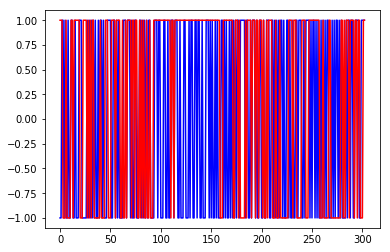

In [11]:
plot_ground_truth(predictions, target_test_vals)

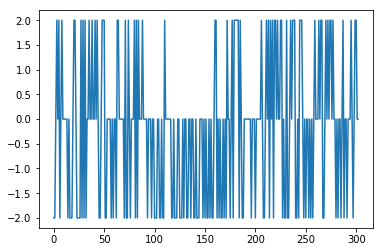

In [12]:
plot_difference(predictions, target_test_vals)

In [13]:
# v3_fantom
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v3_fantom)
predictions, target_test_vals, accuracy = logistic_regression_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["logistic_regression_v3_fantom"] = accuracy

            transactionCount    priceUSD  amountBorrowsUSD  amountDepositsUSD  \
DateTime                                                                        
2022-03-16               409  105.659008      1.040722e+13       9.753237e+13   
2022-03-17               471  115.666437      2.915366e+13       1.721400e+14   
2022-03-18               388  119.928740      3.380304e+13       9.150031e+13   
2022-03-19               328  138.785951      1.541704e+13       3.120925e+13   
2022-03-20               304  120.511904      6.928451e+12       4.786379e+13   
...                      ...         ...               ...                ...   
2023-08-29                 3  223.160716      0.000000e+00       0.000000e+00   
2023-09-03                 4  188.384698      0.000000e+00       0.000000e+00   
2023-09-04                10  335.933918      0.000000e+00       0.000000e+00   
2023-09-05                 4  188.612994      0.000000e+00       0.000000e+00   
2023-09-06                 4

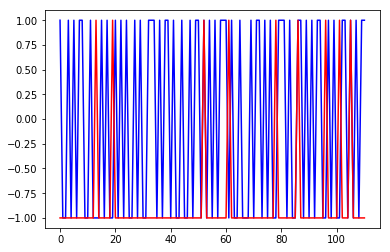

In [14]:
plot_ground_truth(predictions, target_test_vals)

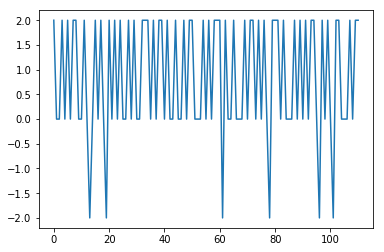

In [15]:
plot_difference(predictions, target_test_vals)

In [16]:
# # v2_polygon
# feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_polygon)
# predictions, target_test_vals, accuracy = logistic_regression_model(feature_train, feature_test, target_train, target_test)
# # make record for the accuracy
# machine_learning_model_record["logistic_regression_v2_polygon"] = accuracy

In [17]:
# plot_ground_truth(predictions, target_test_vals)

In [18]:
# plot_difference(predictions, target_test_vals)

In [19]:
def knn_model(feature_train, feature_test, target_train, target_test):
    from sklearn.neighbors import KNeighborsClassifier
    estimator = KNeighborsClassifier(n_neighbors=3)
    estimator.fit(feature_train, target_train)
    # We compute the predictions for the feature_test features:
    predictions = estimator.predict(feature_test)
    # The line below just computes the average accuracy of our predictions:
    np.linalg.norm(predictions - target_test) / len(target_test)
    target_test_vals = list()
    for data in target_test:
        target_test_vals.append(data)
    # model evaluation
    target_predict = estimator.predict(feature_test)
    print("-------------------- knn --------------------\n")
    print("The target_predict is:\n", target_predict)
    print("Compare predicted results with actual values:\n", target_predict == target_test)
    accuracy = estimator.score(feature_test, target_test) * 100
    print("Accuracy:\n{0:.2f}%".format(accuracy))
    return predictions, target_test_vals, accuracy

In [20]:
# k nearest neighbors run
print("-------------------- data of v2 mainnet --------------------\n")
dailyTransactionCount_v2_mainnet = transaction_v2_mainnet()
print("-------------------- data of v3 fantom --------------------\n")
dailyTransactionCount_v3_fantom = transaction_v3_fantom()
# print("-------------------- data of v2 polygon --------------------\n")
# dailyTransactionCount_v2_polygon = transaction_v2_polygon()

# v2_mainnet
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_mainnet)
predictions, target_test_vals, accuracy = knn_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["knn_v2_mainnet"] = accuracy

-------------------- data of v2 mainnet --------------------

            principalAmountUSD  collateralAmountUSD
DateTime                                           
2020-12-17        15881.042424         17061.108025
2020-12-20         3815.180985          4050.023731
2020-12-22       165563.827063        180316.748890
2020-12-23       198046.492536        217020.301686
2020-12-24         8158.527824          8974.380607
...                        ...                  ...
2024-03-28         3062.665129          3215.798386
2024-03-30         2767.297564          2891.825953
2024-03-31          798.600443           835.193743
2024-04-01         2925.317393          3093.671410
2024-04-02       217328.546370        228479.160108

[991 rows x 2 columns]
            amountBorrowsUSD
DateTime                    
2020-12-01      1.001646e+00
2020-12-02      3.356704e+02
2020-12-03      7.422975e+05
2020-12-04      1.110540e+06
2020-12-05      1.344374e+06
...                      ...
2024-0

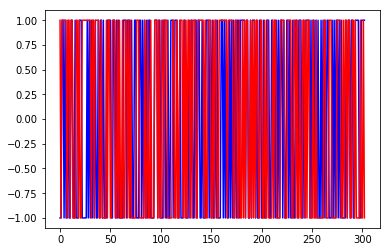

In [21]:
plot_ground_truth(predictions, target_test_vals)

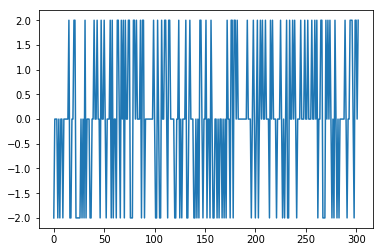

In [22]:
plot_difference(predictions, target_test_vals)

In [23]:
# v3_fantom
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v3_fantom)
predictions, target_test_vals, accuracy = knn_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["knn_v3_fantom"] = accuracy

            transactionCount    priceUSD  amountBorrowsUSD  amountDepositsUSD  \
DateTime                                                                        
2022-03-16               409  105.659008      1.040722e+13       9.753237e+13   
2022-03-17               471  115.666437      2.915366e+13       1.721400e+14   
2022-03-18               388  119.928740      3.380304e+13       9.150031e+13   
2022-03-19               328  138.785951      1.541704e+13       3.120925e+13   
2022-03-20               304  120.511904      6.928451e+12       4.786379e+13   
...                      ...         ...               ...                ...   
2023-08-29                 3  223.160716      0.000000e+00       0.000000e+00   
2023-09-03                 4  188.384698      0.000000e+00       0.000000e+00   
2023-09-04                10  335.933918      0.000000e+00       0.000000e+00   
2023-09-05                 4  188.612994      0.000000e+00       0.000000e+00   
2023-09-06                 4

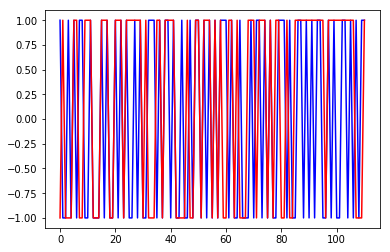

In [24]:
plot_ground_truth(predictions, target_test_vals)

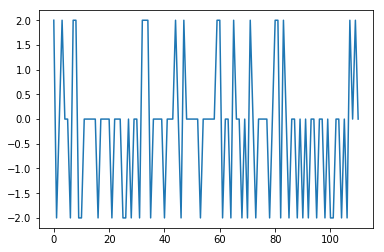

In [25]:
plot_difference(predictions, target_test_vals)

In [26]:
# # v2_polygon
# feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_polygon)
# predictions, target_test_vals, accuracy = knn_model(feature_train, feature_test, target_train, target_test)
# # make record for the accuracy
# machine_learning_model_record["knn_v2_polygon"] = accuracy

In [27]:
# plot_ground_truth(predictions, target_test_vals)

In [28]:
# plot_difference(predictions, target_test_vals)

In [29]:
def knn_model_gridSearchCV(feature_train, feature_test, target_train, target_test):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler
    transfer = StandardScaler()
    # train data standardization
    feature_train = transfer.fit_transform(feature_train)
    feature_test = transfer.transform(feature_test)
    estimator = KNeighborsClassifier(n_neighbors=3, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", metric_params=None, n_jobs=None)
    # KNN model optimization
    estimator = KNeighborsClassifier()
    parameters_testcase = {"n_neighbors": [3, 5, 7, 9, 11, 13]}
    estimator = GridSearchCV(estimator, parameters_testcase, cv=3)
    estimator.fit(feature_train, target_train)
    # We compute the predictions for the feature_test features:
    predictions = estimator.predict(feature_test)
    # The line below just computes the average accuracy of our predictions:
    np.linalg.norm(predictions - target_test) / len(target_test)
    target_test_vals = list()
    for data in target_test:
        target_test_vals.append(data)
    # model evaluation
    target_predict = estimator.predict(feature_test)
    print("-------------------- knn with gridSearchCV --------------------\n")
    print("The target_predict is:\n", target_predict)
    print("Compare predicted results with actual values:\n", target_predict == target_test)
    accuracy = estimator.score(feature_test, target_test) * 100
    print("Accuracy:\n{0:.2f}%".format(accuracy))
    return predictions, target_test_vals, accuracy

In [30]:
# k nearest neighbors with grid search run
print("-------------------- data of v2 mainnet --------------------\n")
dailyTransactionCount_v2_mainnet = transaction_v2_mainnet()
print("-------------------- data of v3 fantom --------------------\n")
dailyTransactionCount_v3_fantom = transaction_v3_fantom()
# print("-------------------- data of v2 polygon --------------------\n")
# dailyTransactionCount_v2_polygon = transaction_v2_polygon()

# v2_mainnet
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_mainnet)
predictions, target_test_vals, accuracy = knn_model_gridSearchCV(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["knn_gridSearch_v2_mainnet"] = accuracy

-------------------- data of v2 mainnet --------------------

            principalAmountUSD  collateralAmountUSD
DateTime                                           
2020-12-17        15881.042424         17061.108025
2020-12-20         3815.180985          4050.023731
2020-12-22       165563.827063        180316.748890
2020-12-23       198046.492536        217020.301686
2020-12-24         8158.527824          8974.380607
...                        ...                  ...
2024-03-28         3062.665129          3215.798386
2024-03-30         2767.297564          2891.825953
2024-03-31          798.600443           835.193743
2024-04-01         2925.317393          3093.671410
2024-04-02       217328.546370        228479.160108

[991 rows x 2 columns]
            amountBorrowsUSD
DateTime                    
2020-12-01      1.001646e+00
2020-12-02      3.356704e+02
2020-12-03      7.422975e+05
2020-12-04      1.110540e+06
2020-12-05      1.344374e+06
...                      ...
2024-0

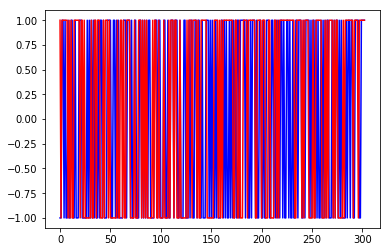

In [31]:
plot_ground_truth(predictions, target_test_vals)

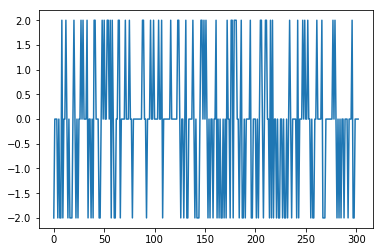

In [32]:
plot_difference(predictions, target_test_vals)

In [33]:
# v3_fantom
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v3_fantom)
predictions, target_test_vals, accuracy = knn_model_gridSearchCV(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["knn_gridSearch_v3_fantom"] = accuracy

            transactionCount    priceUSD  amountBorrowsUSD  amountDepositsUSD  \
DateTime                                                                        
2022-03-16               409  105.659008      1.040722e+13       9.753237e+13   
2022-03-17               471  115.666437      2.915366e+13       1.721400e+14   
2022-03-18               388  119.928740      3.380304e+13       9.150031e+13   
2022-03-19               328  138.785951      1.541704e+13       3.120925e+13   
2022-03-20               304  120.511904      6.928451e+12       4.786379e+13   
...                      ...         ...               ...                ...   
2023-08-29                 3  223.160716      0.000000e+00       0.000000e+00   
2023-09-03                 4  188.384698      0.000000e+00       0.000000e+00   
2023-09-04                10  335.933918      0.000000e+00       0.000000e+00   
2023-09-05                 4  188.612994      0.000000e+00       0.000000e+00   
2023-09-06                 4

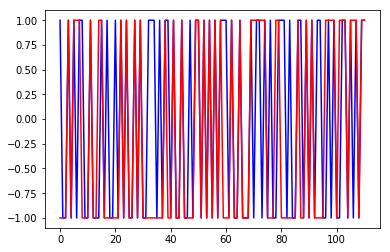

In [34]:
plot_ground_truth(predictions, target_test_vals)

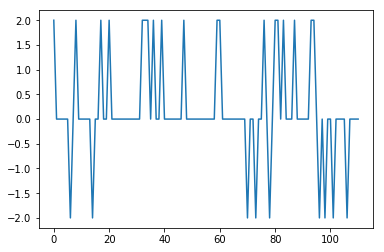

In [35]:
plot_difference(predictions, target_test_vals)

In [36]:
# # v2_polygon
# feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_polygon)
# predictions, target_test_vals, accuracy = knn_model_gridSearchCV(feature_train, feature_test, target_train, target_test)
# # make record for the accuracy
# machine_learning_model_record["knn_gridSearch_v2_polygon"] = accuracy

In [37]:
# plot_ground_truth(predictions, target_test_vals)

In [38]:
# plot_difference(predictions, target_test_vals)

In [39]:
def multinomialNB_model(feature_train, feature_test, target_train, target_test):
    from sklearn.naive_bayes import MultinomialNB
    estimator = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    fit = estimator.fit(feature_train, target_train)
    # We compute the predictions for the feature_test features:
    predictions = fit.predict(feature_test)
    # The line below just computes the average accuracy of our predictions:
    np.linalg.norm(predictions - target_test) / len(target_test)
    target_test_vals = list()
    for data in target_test:
        target_test_vals.append(data)
    # model evaluation
    target_predict = estimator.predict(feature_test)
    print("-------------------- naive bayes --------------------\n")
    print("The target_predict is:\n", target_predict)
    print("Compare predicted results with actual values:\n", target_predict == target_test)
    accuracy = estimator.score(feature_test, target_test) * 100
    print("Accuracy:\n{0:.2f}%".format(accuracy))
    return predictions, target_test_vals, accuracy

In [40]:
# naive bayes classifier run
print("-------------------- data of v2 mainnet --------------------\n")
dailyTransactionCount_v2_mainnet = transaction_v2_mainnet()
print("-------------------- data of v3 fantom --------------------\n")
dailyTransactionCount_v3_fantom = transaction_v3_fantom()
# print("-------------------- data of v2 polygon --------------------\n")
# dailyTransactionCount_v2_polygon = transaction_v2_polygon()

# v2_mainnet
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_mainnet)
predictions, target_test_vals, accuracy = multinomialNB_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["naive_bayes_v2_mainnet"] = accuracy

-------------------- data of v2 mainnet --------------------

            principalAmountUSD  collateralAmountUSD
DateTime                                           
2020-12-17        15881.042424         17061.108025
2020-12-20         3815.180985          4050.023731
2020-12-22       165563.827063        180316.748890
2020-12-23       198046.492536        217020.301686
2020-12-24         8158.527824          8974.380607
...                        ...                  ...
2024-03-28         3062.665129          3215.798386
2024-03-30         2767.297564          2891.825953
2024-03-31          798.600443           835.193743
2024-04-01         2925.317393          3093.671410
2024-04-02       217328.546370        228479.160108

[991 rows x 2 columns]
            amountBorrowsUSD
DateTime                    
2020-12-01      1.001646e+00
2020-12-02      3.356704e+02
2020-12-03      7.422975e+05
2020-12-04      1.110540e+06
2020-12-05      1.344374e+06
...                      ...
2024-0

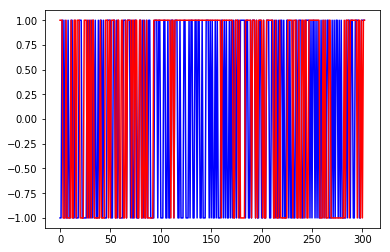

In [41]:
plot_ground_truth(predictions, target_test_vals)

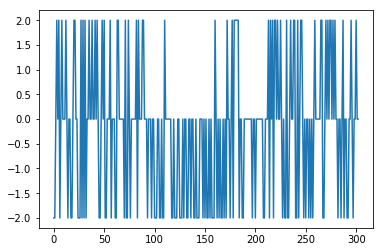

In [42]:
plot_difference(predictions, target_test_vals)

In [43]:
# v3_fantom
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v3_fantom)
predictions, target_test_vals, accuracy = multinomialNB_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["naive_bayes_v3_fantom"] = accuracy

            transactionCount    priceUSD  amountBorrowsUSD  amountDepositsUSD  \
DateTime                                                                        
2022-03-16               409  105.659008      1.040722e+13       9.753237e+13   
2022-03-17               471  115.666437      2.915366e+13       1.721400e+14   
2022-03-18               388  119.928740      3.380304e+13       9.150031e+13   
2022-03-19               328  138.785951      1.541704e+13       3.120925e+13   
2022-03-20               304  120.511904      6.928451e+12       4.786379e+13   
...                      ...         ...               ...                ...   
2023-08-29                 3  223.160716      0.000000e+00       0.000000e+00   
2023-09-03                 4  188.384698      0.000000e+00       0.000000e+00   
2023-09-04                10  335.933918      0.000000e+00       0.000000e+00   
2023-09-05                 4  188.612994      0.000000e+00       0.000000e+00   
2023-09-06                 4

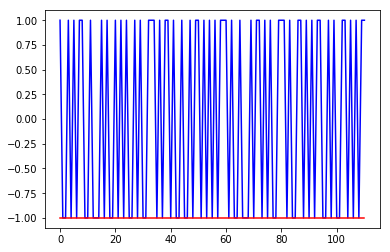

In [44]:
plot_ground_truth(predictions, target_test_vals)

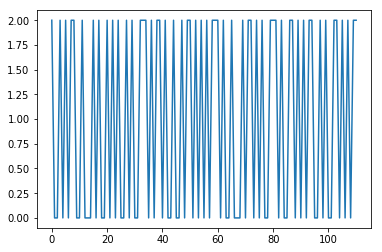

In [45]:
plot_difference(predictions, target_test_vals)

In [46]:
# # v2_polygon
# feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_polygon)
# predictions, target_test_vals, accuracy = multinomialNB_model(feature_train, feature_test, target_train, target_test)
# # make record for the accuracy
# machine_learning_model_record["naive_bayes_v2_polygon"] = accuracy

In [47]:
# plot_ground_truth(predictions, target_test_vals)

In [48]:
# plot_difference(predictions, target_test_vals)

In [49]:
def decision_tree_model(feature_train, feature_test, target_train, target_test):
    from sklearn.tree import DecisionTreeClassifier
    estimator = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0)
    fit = estimator.fit(feature_train, target_train)
    # We compute the predictions for the feature_test features:
    predictions = fit.predict(feature_test)
    # The line below just computes the average accuracy of our predictions:
    np.linalg.norm(predictions - target_test) / len(target_test)
    target_test_vals = list()
    for data in target_test:
        target_test_vals.append(data)
    # model evaluation
    target_predict = estimator.predict(feature_test)
    print("-------------------- decision tree --------------------\n")
    print("The target_predict is:\n", target_predict)
    print("Compare predicted results with actual values:\n", target_predict == target_test)
    accuracy = estimator.score(feature_test, target_test) * 100
    print("Accuracy:\n{0:.2f}%".format(accuracy))
    return predictions, target_test_vals, accuracy

In [50]:
# decision tree run
print("-------------------- data of v2 mainnet --------------------\n")
dailyTransactionCount_v2_mainnet = transaction_v2_mainnet()
print("-------------------- data of v3 fantom --------------------\n")
dailyTransactionCount_v3_fantom = transaction_v3_fantom()
# print("-------------------- data of v2 polygon --------------------\n")
# dailyTransactionCount_v2_polygon = transaction_v2_polygon()

# v2_mainnet
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_mainnet)
predictions, target_test_vals, accuracy = decision_tree_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["decision_tree_v2_mainnet"] = accuracy

-------------------- data of v2 mainnet --------------------

            principalAmountUSD  collateralAmountUSD
DateTime                                           
2020-12-17        15881.042424         17061.108025
2020-12-20         3815.180985          4050.023731
2020-12-22       165563.827063        180316.748890
2020-12-23       198046.492536        217020.301686
2020-12-24         8158.527824          8974.380607
...                        ...                  ...
2024-03-28         3062.665129          3215.798386
2024-03-30         2767.297564          2891.825953
2024-03-31          798.600443           835.193743
2024-04-01         2925.317393          3093.671410
2024-04-02       217328.546370        228479.160108

[991 rows x 2 columns]
            amountBorrowsUSD
DateTime                    
2020-12-01      1.001646e+00
2020-12-02      3.356704e+02
2020-12-03      7.422975e+05
2020-12-04      1.110540e+06
2020-12-05      1.344374e+06
...                      ...
2024-0

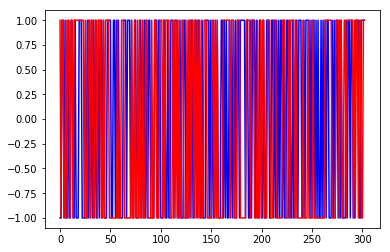

In [51]:
plot_ground_truth(predictions, target_test_vals)

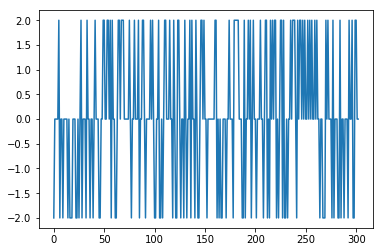

In [52]:
plot_difference(predictions, target_test_vals)

In [53]:
# v3_fantom
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v3_fantom)
predictions, target_test_vals, accuracy = decision_tree_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["decision_tree_v3_fantom"] = accuracy

            transactionCount    priceUSD  amountBorrowsUSD  amountDepositsUSD  \
DateTime                                                                        
2022-03-16               409  105.659008      1.040722e+13       9.753237e+13   
2022-03-17               471  115.666437      2.915366e+13       1.721400e+14   
2022-03-18               388  119.928740      3.380304e+13       9.150031e+13   
2022-03-19               328  138.785951      1.541704e+13       3.120925e+13   
2022-03-20               304  120.511904      6.928451e+12       4.786379e+13   
...                      ...         ...               ...                ...   
2023-08-29                 3  223.160716      0.000000e+00       0.000000e+00   
2023-09-03                 4  188.384698      0.000000e+00       0.000000e+00   
2023-09-04                10  335.933918      0.000000e+00       0.000000e+00   
2023-09-05                 4  188.612994      0.000000e+00       0.000000e+00   
2023-09-06                 4

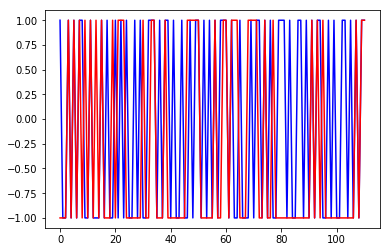

In [54]:
plot_ground_truth(predictions, target_test_vals)

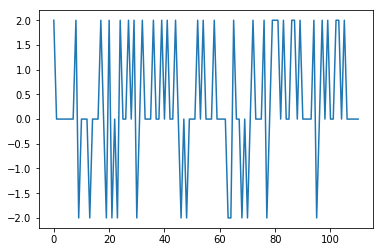

In [55]:
plot_difference(predictions, target_test_vals)

In [56]:
# # v2_polygon
# feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_polygon)
# predictions, target_test_vals, accuracy = decision_tree_model(feature_train, feature_test, target_train, target_test)
# # make record for the accuracy
# machine_learning_model_record["decision_tree_v2_polygon"] = accuracy

In [57]:
# plot_ground_truth(predictions, target_test_vals)

In [58]:
# plot_difference(predictions, target_test_vals)

In [59]:
def random_forest_model(feature_train, feature_test, target_train, target_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    estimator = RandomForestClassifier()
    param_dict = {"n_estimators": [120,200,300,500,800,1200], "max_depth": [5,8,15,25,30]}
    estimator = GridSearchCV(estimator, param_grid=param_dict, cv=3)
    estimator.fit(feature_train, target_train)
    # We compute the predictions for the feature_test features:
    predictions = estimator.predict(feature_test)
    # The line below just computes the average accuracy of our predictions:
    np.linalg.norm(predictions - target_test) / len(target_test)
    target_test_vals = list()
    for data in target_test:
        target_test_vals.append(data)
    # model evaluation
    target_predict = estimator.predict(feature_test)
    print("-------------------- random forest --------------------\n")
    print("The target_predict is:\n", target_predict)
    print("Compare predicted results with actual values:\n", target_predict == target_test)
    accuracy = estimator.score(feature_test, target_test) * 100
    print("Accuracy:\n{0:.2f}%".format(accuracy))
    return predictions, target_test_vals, accuracy

In [60]:
# decision tree run
print("-------------------- data of v2 mainnet --------------------\n")
dailyTransactionCount_v2_mainnet = transaction_v2_mainnet()
print("-------------------- data of v3 fantom --------------------\n")
dailyTransactionCount_v3_fantom = transaction_v3_fantom()
# print("-------------------- data of v2 polygon --------------------\n")
# dailyTransactionCount_v2_polygon = transaction_v2_polygon()

# v2_mainnet
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_mainnet)
predictions, target_test_vals, accuracy = random_forest_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["random_forest_v2_mainnet"] = accuracy

-------------------- data of v2 mainnet --------------------

            principalAmountUSD  collateralAmountUSD
DateTime                                           
2020-12-17        15881.042424         17061.108025
2020-12-20         3815.180985          4050.023731
2020-12-22       165563.827063        180316.748890
2020-12-23       198046.492536        217020.301686
2020-12-24         8158.527824          8974.380607
...                        ...                  ...
2024-03-28         3062.665129          3215.798386
2024-03-30         2767.297564          2891.825953
2024-03-31          798.600443           835.193743
2024-04-01         2925.317393          3093.671410
2024-04-02       217328.546370        228479.160108

[991 rows x 2 columns]
            amountBorrowsUSD
DateTime                    
2020-12-01      1.001646e+00
2020-12-02      3.356704e+02
2020-12-03      7.422975e+05
2020-12-04      1.110540e+06
2020-12-05      1.344374e+06
...                      ...
2024-0

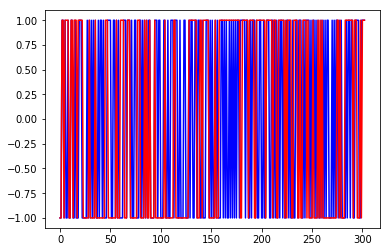

In [61]:
plot_ground_truth(predictions, target_test_vals)

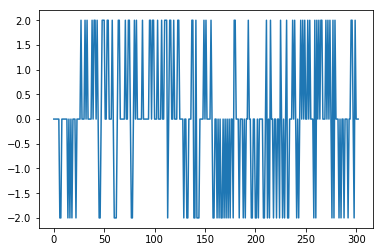

In [62]:
plot_difference(predictions, target_test_vals)

In [63]:
# v3_fantom
feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v3_fantom)
predictions, target_test_vals, accuracy = random_forest_model(feature_train, feature_test, target_train, target_test)
# make record for the accuracy
machine_learning_model_record["random_forest_v3_fantom"] = accuracy

            transactionCount    priceUSD  amountBorrowsUSD  amountDepositsUSD  \
DateTime                                                                        
2022-03-16               409  105.659008      1.040722e+13       9.753237e+13   
2022-03-17               471  115.666437      2.915366e+13       1.721400e+14   
2022-03-18               388  119.928740      3.380304e+13       9.150031e+13   
2022-03-19               328  138.785951      1.541704e+13       3.120925e+13   
2022-03-20               304  120.511904      6.928451e+12       4.786379e+13   
...                      ...         ...               ...                ...   
2023-08-29                 3  223.160716      0.000000e+00       0.000000e+00   
2023-09-03                 4  188.384698      0.000000e+00       0.000000e+00   
2023-09-04                10  335.933918      0.000000e+00       0.000000e+00   
2023-09-05                 4  188.612994      0.000000e+00       0.000000e+00   
2023-09-06                 4

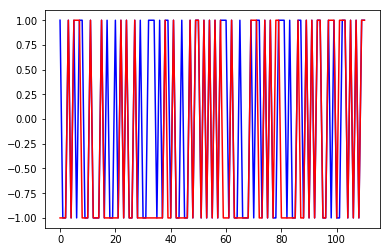

In [64]:
plot_ground_truth(predictions, target_test_vals)

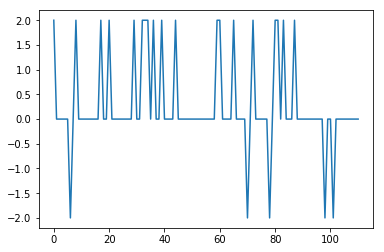

In [65]:
plot_difference(predictions, target_test_vals)

In [66]:
# # v2_polygon
# feature_train, feature_test, target_train, target_test = data_split2(dailyTransactionCount_v2_polygon)
# predictions, target_test_vals, accuracy = random_forest_model(feature_train, feature_test, target_train, target_test)
# # make record for the accuracy
# machine_learning_model_record["random_forest_v2_polygon"] = accuracy

In [67]:
# plot_ground_truth(predictions, target_test_vals)

In [68]:
# plot_difference(predictions, target_test_vals)

In [69]:
# model accuracy record
for i in machine_learning_model_record.keys():
    print("The accuracy of model: {} is {:.2f}%\n".format(i, machine_learning_model_record.get(i)))

The accuracy of model: logistic_regression_v2_mainnet is 46.20%

The accuracy of model: logistic_regression_v3_fantom is 47.75%

The accuracy of model: knn_v2_mainnet is 50.50%

The accuracy of model: knn_v3_fantom is 55.86%

The accuracy of model: knn_gridSearch_v2_mainnet is 55.45%

The accuracy of model: knn_gridSearch_v3_fantom is 74.77%

The accuracy of model: naive_bayes_v2_mainnet is 48.84%

The accuracy of model: naive_bayes_v3_fantom is 50.45%

The accuracy of model: decision_tree_v2_mainnet is 49.83%

The accuracy of model: decision_tree_v3_fantom is 59.46%

The accuracy of model: random_forest_v2_mainnet is 56.77%

The accuracy of model: random_forest_v3_fantom is 78.38%

